### Vending Machine Data

In [1]:
# key libraries 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd

import missingno as msno 
import datetime as dt
from cycler import cycler
import sklearn
import json


In [2]:
data = pd.read_csv('vending_machine_sales.csv')
data.head()

Status    Device ID           Location               Machine  \
0  Processed  VJ300320611  Brunswick Sq Mall  BSQ Mall x1366 - ATT   
1  Processed  VJ300320611  Brunswick Sq Mall  BSQ Mall x1366 - ATT   
2  Processed  VJ300320611  Brunswick Sq Mall  BSQ Mall x1366 - ATT   
3  Processed  VJ300320611  Brunswick Sq Mall  BSQ Mall x1366 - ATT   
4  Processed  VJ300320611  Brunswick Sq Mall  BSQ Mall x1366 - ATT   

                                Product    Category  Transaction  \
0  Red Bull - Energy Drink - Sugar Free  Carbonated  14515778905   
1  Red Bull - Energy Drink - Sugar Free  Carbonated  14516018629   
2      Takis - Hot Chilli Pepper & Lime        Food  14516018629   
3      Takis - Hot Chilli Pepper & Lime        Food  14516020373   
4  Red Bull - Energy Drink - Sugar Free  Carbonated  14516021756   

                   TransDate    Type  RCoil  RPrice  RQty  MCoil  MPrice  \
0  Saturday, January 1, 2022  Credit    148     3.5     1    148     3.5   
1  Saturday, January 1, 2022  Credit    148     3.5     1    148     3.5   
2  Saturday, January 1, 2022  Credit    123     1.5     1    123     1.5   
3  Saturday, January 1, 2022  Credit    123     1.5     1    123     1.5   
4  Saturday, January 1, 2022  Credit    148     3.5     1    148     3.5   

   MQty  LineTotal  TransTotal Prcd Date  
0     1        3.5         3.5  01/01/22  
1     1        3.5         5.0  01/01/22  
2     1        1.5         5.0  01/01/22  
3     1        1.5         1.5  01/01/22  
4     1        3.5         3.5  01/01/22

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6441 entries, 0 to 6440
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Status       6441 non-null   object 
 1   Device ID    6441 non-null   object 
 2   Location     6441 non-null   object 
 3   Machine      6441 non-null   object 
 4   Product      6441 non-null   object 
 5   Category     6441 non-null   object 
 6   Transaction  6441 non-null   int64  
 7   TransDate    6441 non-null   object 
 8   Type         6441 non-null   object 
 9   RCoil        6441 non-null   int64  
 10  RPrice       6441 non-null   float64
 11  RQty         6441 non-null   int64  
 12  MCoil        6441 non-null   int64  
 13  MPrice       6441 non-null   float64
 14  MQty         6441 non-null   int64  
 15  LineTotal    6441 non-null   float64
 16  TransTotal   6441 non-null   float64
 17  Prcd Date    6441 non-null   object 
dtypes: float64(4), int64(5), object(9)
memory usage:

##### RCoil : Coil number of product 
##### RPrice : Price of the product
##### RQTY : Quantity of the product sold 
##### LineTotal : Total sale per transaction 
##### TransTotal : Represents total of all transactions that will show up on the Credit Card. A user could vend a drink for USD 3 and a snack for USD 1.5 making a total of USD 4.50 
### 

In [4]:
data.describe().T

count          mean           std           min           25%  \
Transaction  6441.0  1.513399e+10  2.983598e+08  1.451578e+10  1.490967e+10   
RCoil        6441.0  1.331789e+02  1.291010e+01  1.100000e+02  1.220000e+02   
RPrice       6441.0  1.926836e+00  6.732994e-01  1.000000e+00  1.500000e+00   
RQty         6441.0  1.013352e+00  1.213612e-01  1.000000e+00  1.000000e+00   
MCoil        6441.0  1.331789e+02  1.291010e+01  1.100000e+02  1.220000e+02   
MPrice       6441.0  1.926836e+00  6.732994e-01  1.000000e+00  1.500000e+00   
MQty         6441.0  1.013352e+00  1.213612e-01  1.000000e+00  1.000000e+00   
LineTotal    6441.0  1.949697e+00  7.032756e-01  1.000000e+00  1.500000e+00   
TransTotal   6441.0  2.183201e+00  1.044252e+00  1.000000e+00  1.500000e+00   

                      50%           75%           max  
Transaction  1.516785e+10  1.538483e+10  1.560392e+10  
RCoil        1.380000e+02  1.440000e+02  1.650000e+02  
RPrice       1.500000e+00  2.500000e+00  5.000000e+00  
RQty         1.000000e+00  1.000000e+00  3.000000e+00  
MCoil        1.380000e+02  1.440000e+02  1.650000e+02  
MPrice       1.500000e+00  2.500000e+00  5.000000e+00  
MQty         1.000000e+00  1.000000e+00  3.000000e+00  
LineTotal    1.500000e+00  2.500000e+00  8.000000e+00  
TransTotal   2.000000e+00  2.750000e+00  8.000000e+00

In [5]:
# Check for duplicates
data.duplicated().sum()

0

In [6]:
data['TransMonth'] = pd.DatetimeIndex(data['TransDate']).month
data.tail()

Status    Device ID           Location                  Machine  \
6436  Processed  VJ300320692  EB Public Library  EB Public Library x1380   
6437  Processed  VJ300320692  EB Public Library  EB Public Library x1380   
6438  Processed  VJ300320692  EB Public Library  EB Public Library x1380   
6439  Processed  VJ300320609        GuttenPlans        GuttenPlans x1367   
6440  Processed  VJ300320692  EB Public Library  EB Public Library x1380   

                             Product        Category  Transaction  \
6436    Lindens - Chocolate Chippers            Food  15603201222   
6437  Wonderful Pistachios - Variety            Food  15603201222   
6438  Hungry Buddha - Chocolate Chip            Food  15603201222   
6439             Snapple Tea - Lemon  Non Carbonated  15603853105   
6440        Goldfish Baked - Cheddar            Food  15603921383   

                       TransDate    Type  RCoil  RPrice  RQty  MCoil  MPrice  \
6436  Wednesday, August 31, 2022  Credit    122     2.0     1    122     2.0   
6437  Wednesday, August 31, 2022  Credit    131     2.0     1    131     2.0   
6438  Wednesday, August 31, 2022  Credit    137     2.0     1    137     2.0   
6439  Wednesday, August 31, 2022  Credit    145     2.5     1    145     2.5   
6440  Wednesday, August 31, 2022    Cash    125     1.5     1    125     1.5   

      MQty  LineTotal  TransTotal Prcd Date  TransMonth  
6436     1        2.0         6.0  08/31/22           8  
6437     1        2.0         6.0  08/31/22           8  
6438     1        2.0         6.0  08/31/22           8  
6439     1        2.5         2.5  08/31/22           8  
6440     1        1.5         1.5  08/31/22           8

In [7]:
trend_data = data.pivot_table(index='TransMonth', columns='Category', values='RQty', aggfunc='sum')
trend_data

Category    Carbonated  Food  Non Carbonated  Water
TransMonth                                         
1                  150   256              49     36
2                  162   252              53     36
3                  163   390              45     43
4                  264   451              83     74
5                  182   498             102     78
6                  210   592             123     84
7                  314   585             150     90
8                  254   578             126     54

In [8]:
trend_data = data.pivot_table(index='TransMonth', columns='Category', values='MQty', aggfunc='sum')
trend_data

Category    Carbonated  Food  Non Carbonated  Water
TransMonth                                         
1                  150   256              49     36
2                  162   252              53     36
3                  163   390              45     43
4                  264   451              83     74
5                  182   498             102     78
6                  210   592             123     84
7                  314   585             150     90
8                  254   578             126     54

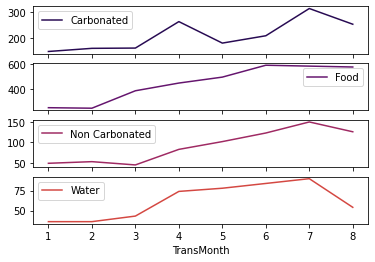

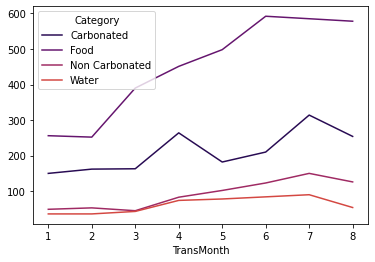

In [9]:
trend_data.plot.line(subplots = True,
                     color = sns.color_palette("inferno"))
plt.show()

default_cycler = (cycler(color=['r', 'g', 'b', 'y']) +
                  cycler(linestyle=['-', '--', ':', '-.']))

trend_data.plot.line(subplots = False,
                     color = sns.color_palette("inferno"))
plt.rc('axes', prop_cycle=default_cycler)
plt.show()

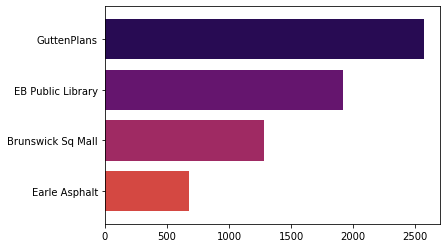

In [10]:
data['Location'].value_counts().plot(kind = 'barh',
                                     color = sns.color_palette("inferno"),
                                     width = 0.8)
plt.gca().invert_yaxis()

In [11]:
trend_data2 = data.pivot_table(index='TransMonth', columns='Category', values='RPrice', aggfunc='sum')
trend_data2

Category    Carbonated     Food  Non Carbonated   Water
TransMonth                                             
1               296.50   402.00          114.50   55.50
2               310.00   394.00          125.50   59.50
3               303.75   608.50          116.50   83.00
4               515.25   749.50          221.25  127.00
5               356.00   884.50          263.00  142.00
6               468.50  1067.25          324.25  145.50
7               646.50  1051.50          383.75  170.00
8               568.50  1021.00          325.50  110.75

<AxesSubplot:xlabel='TransMonth'>

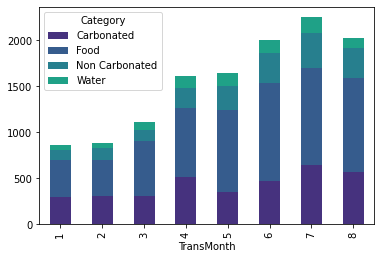

In [12]:
trend_data2.plot(kind='bar',stacked=True, color = sns.color_palette("viridis"), legend=True)

In [13]:
# Get list of categorical variables
categorical_data = data.select_dtypes(include=['object'])
print('Categorical columns:{}'.format(categorical_data.columns.values))

print(len(categorical_data))

Categorical columns:['Status' 'Device ID' 'Location' 'Machine' 'Product' 'Category'
 'TransDate' 'Type' 'Prcd Date']
6441


In [14]:
missing_values_count = categorical_data.isnull().sum()
print(missing_values_count)

Status       0
Device ID    0
Location     0
Machine      0
Product      0
Category     0
TransDate    0
Type         0
Prcd Date    0
dtype: int64


In [15]:
non_categorical_data = data.select_dtypes(exclude=['object'])
print('Non-Categorical columns:{}'.format(non_categorical_data.columns.values))

non_categorical_data.head()

Non-Categorical columns:['Transaction' 'RCoil' 'RPrice' 'RQty' 'MCoil' 'MPrice' 'MQty' 'LineTotal'
 'TransTotal' 'TransMonth']


Transaction  RCoil  RPrice  RQty  MCoil  MPrice  MQty  LineTotal  \
0  14515778905    148     3.5     1    148     3.5     1        3.5   
1  14516018629    148     3.5     1    148     3.5     1        3.5   
2  14516018629    123     1.5     1    123     1.5     1        1.5   
3  14516020373    123     1.5     1    123     1.5     1        1.5   
4  14516021756    148     3.5     1    148     3.5     1        3.5   

   TransTotal  TransMonth  
0         3.5           1  
1         5.0           1  
2         5.0           1  
3         1.5           1  
4         3.5           1

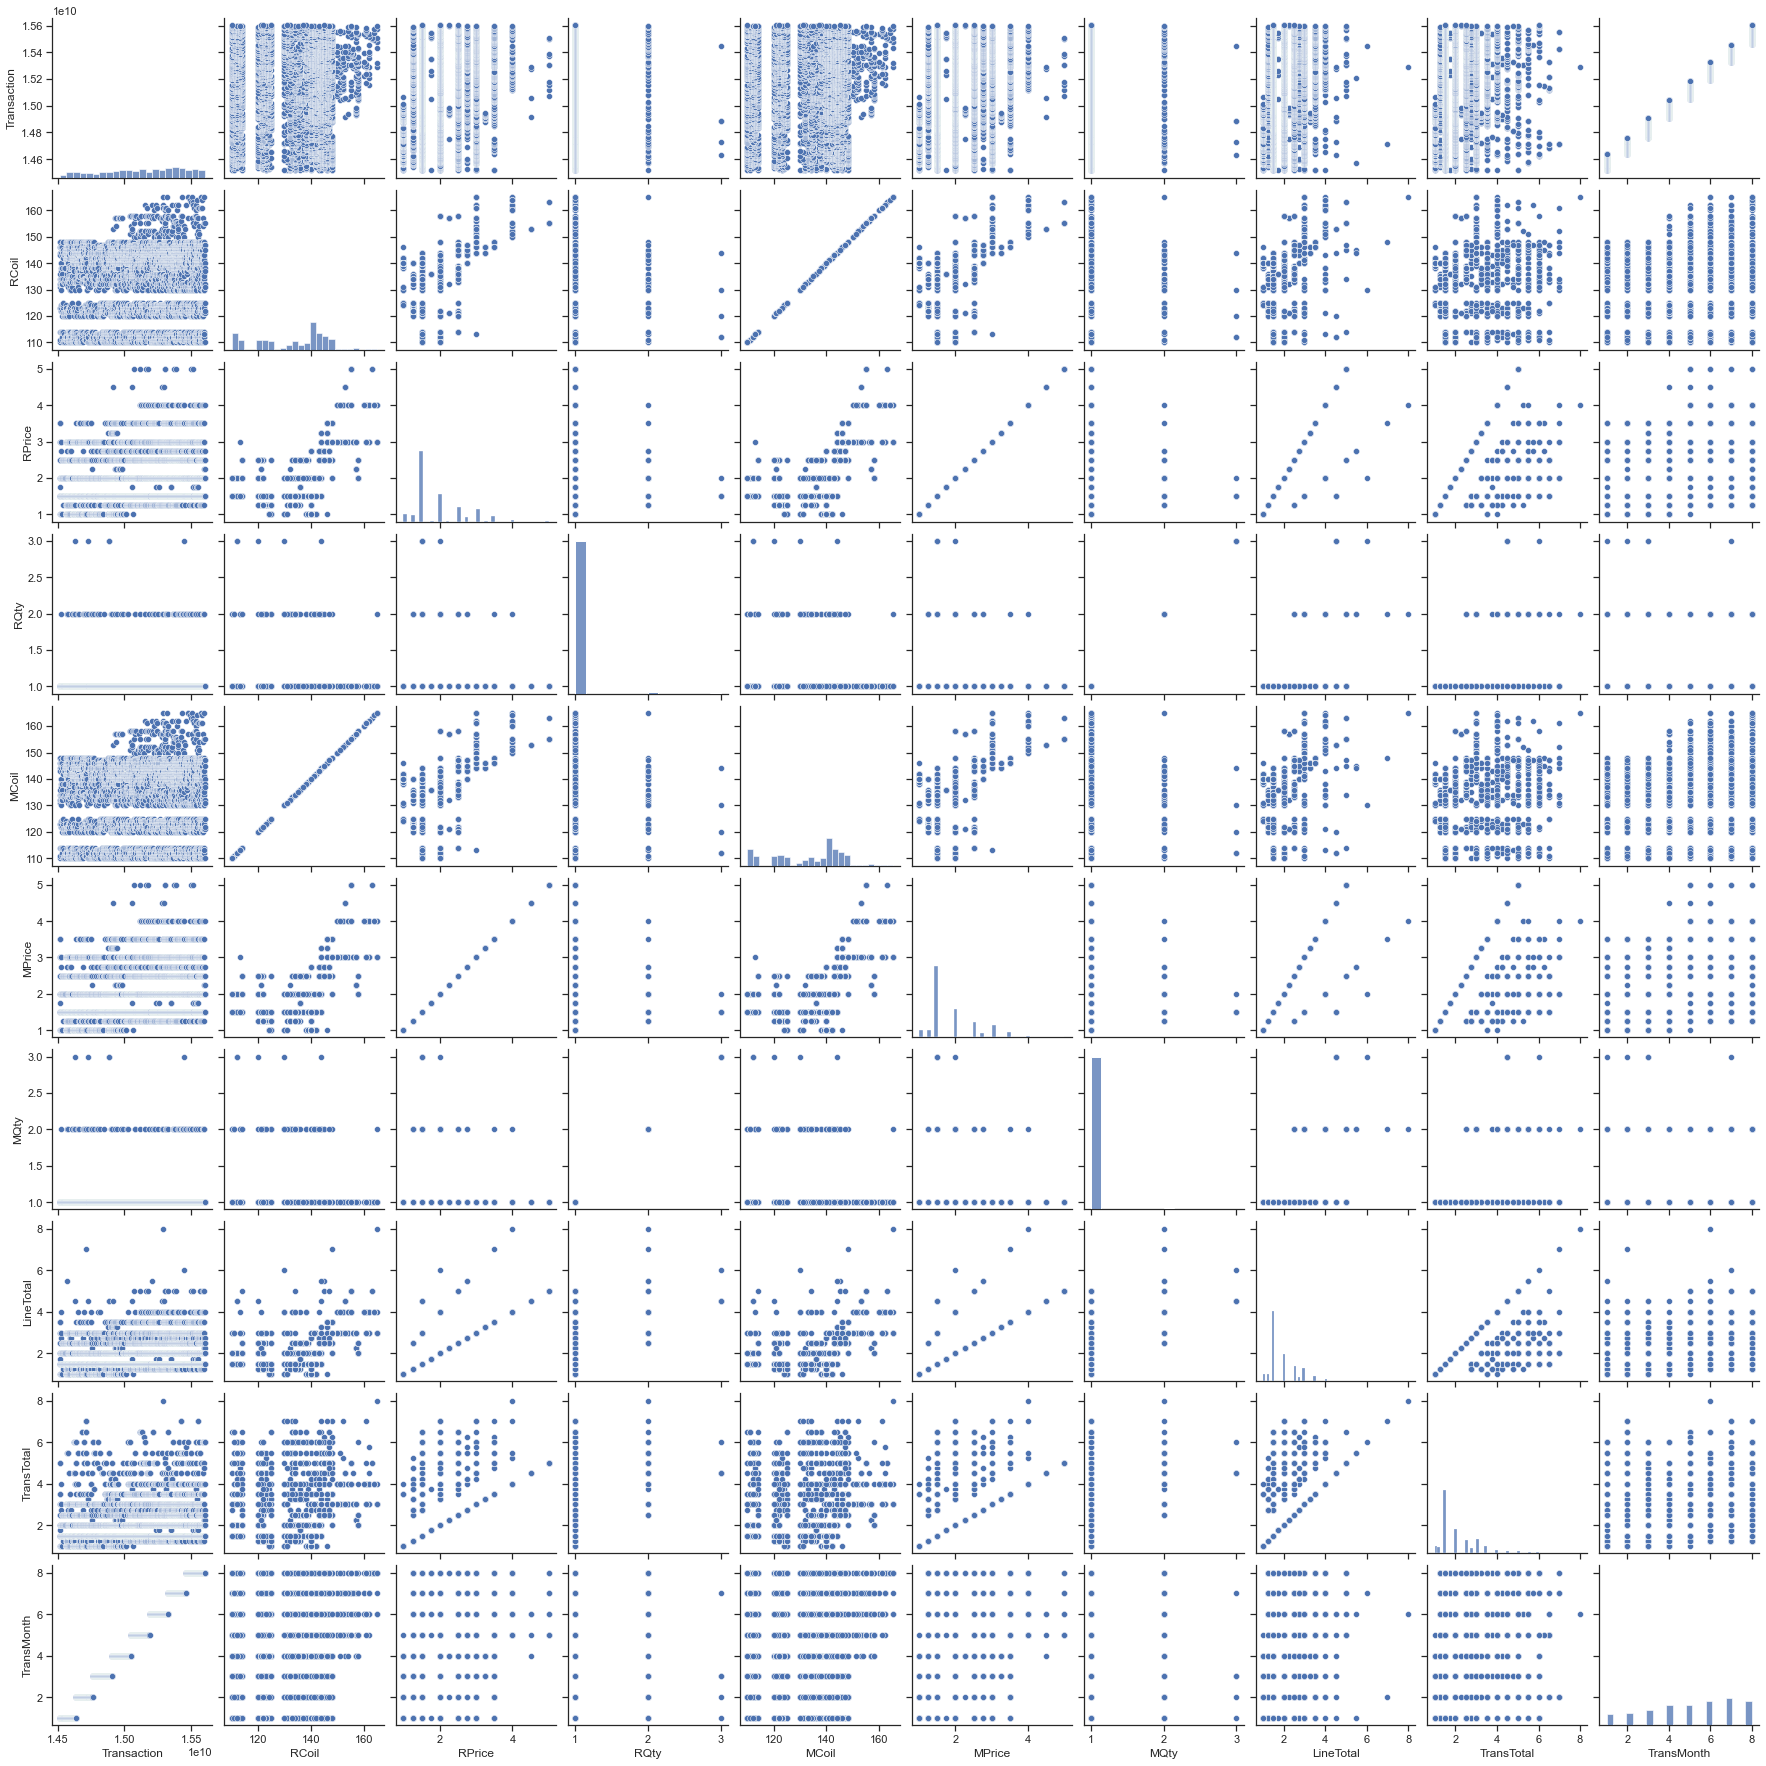

In [16]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(non_categorical_data)

In [17]:
non_categorical_data.corr() 

Transaction     RCoil    RPrice      RQty     MCoil    MPrice  \
Transaction     1.000000  0.053356  0.135044 -0.005056  0.053356  0.135044   
RCoil           0.053356  1.000000  0.567787 -0.023130  1.000000  0.567787   
RPrice          0.135044  0.567787  1.000000 -0.035076  0.567787  1.000000   
RQty           -0.005056 -0.023130 -0.035076  1.000000 -0.023130 -0.035076   
MCoil           0.053356  1.000000  0.567787 -0.023130  1.000000  0.567787   
MPrice          0.135044  0.567787  1.000000 -0.035076  0.567787  1.000000   
MQty           -0.005056 -0.023130 -0.035076  1.000000 -0.023130 -0.035076   
LineTotal       0.128446  0.540044  0.952936  0.259846  0.540044  0.952936   
TransTotal      0.093447  0.305749  0.621012  0.232793  0.305749  0.621012   
TransMonth      0.991123  0.052982  0.134432 -0.009128  0.052982  0.134432   

                 MQty  LineTotal  TransTotal  TransMonth  
Transaction -0.005056   0.128446    0.093447    0.991123  
RCoil       -0.023130   0.540044    0.305749    0.052982  
RPrice      -0.035076   0.952936    0.621012    0.134432  
RQty         1.000000   0.259846    0.232793   -0.009128  
MCoil       -0.023130   0.540044    0.305749    0.052982  
MPrice      -0.035076   0.952936    0.621012    0.134432  
MQty         1.000000   0.259846    0.232793   -0.009128  
LineTotal    0.259846   1.000000    0.669145    0.126699  
TransTotal   0.232793   0.669145    1.000000    0.090595  
TransMonth  -0.009128   0.126699    0.090595    1.000000

<AxesSubplot:>

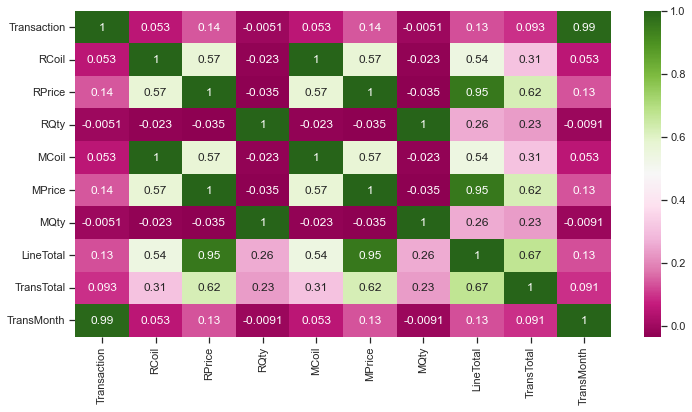

In [18]:
plt.figure(figsize=(12,6))
sns.heatmap(data=non_categorical_data.corr(),annot=True, cmap="PiYG")

In [19]:
missing_values_count = non_categorical_data.isnull().sum()
print(missing_values_count)

Transaction    0
RCoil          0
RPrice         0
RQty           0
MCoil          0
MPrice         0
MQty           0
LineTotal      0
TransTotal     0
TransMonth     0
dtype: int64


In [20]:
# check for any duplicates
non_categorical_data.duplicated().sum()

0

In [21]:
data.columns.unique()

Index(['Status', 'Device ID', 'Location', 'Machine', 'Product', 'Category',
       'Transaction', 'TransDate', 'Type', 'RCoil', 'RPrice', 'RQty', 'MCoil',
       'MPrice', 'MQty', 'LineTotal', 'TransTotal', 'Prcd Date', 'TransMonth'],
      dtype='object')

In [22]:
data['Category'].unique()

array(['Carbonated', 'Food', 'Non Carbonated', 'Water'], dtype=object)

In [23]:
data['Product'].unique()

array(['Red Bull - Energy Drink - Sugar Free',
       'Takis - Hot Chilli Pepper & Lime',
       'Bai Antioxidant - Brasilia BB',
       "Miss Vickie's Potato Chip - Sea Salt & Vinega",
       "Miss Vickie's Potato Chip - Lime & Cracked Pe",
       'Monster Energy Original',
       'Seapoint Farms Dry Roasted Edamame - Wasabi',
       'Snapple Diet Tea - Lemon', 'Skinny Pop Popcorn',
       'Stretch Island Fruit Leathers Snacks - Variet',
       'KitKat - Crisp Wafers', 'Wonderful Pistachios - Variety',
       'Spindrift - Sparkling Water  Lime',
       "Miss Vickie's Potato Chip - Sea Salt Original",
       'Jacks Links Bar Beef Strip',
       'Vitamin Water - XXX Acai BB Pomegranate',
       'Cheetos - Fleming Hot Crunchy',
       'Pure Organic Fruit Bar - Strawberry Banana', 'Oreo Mini',
       'Nutter Butter Bites', 'Jack Links Beef Steak Original',
       "Robert Irvine's - Fit Crunch -  Chocolate Pea",
       'Good Health Veggie Stix - Zesty Ranch',
       'Cheetos Baked - Flamin

<Figure size 1600x800 with 0 Axes>

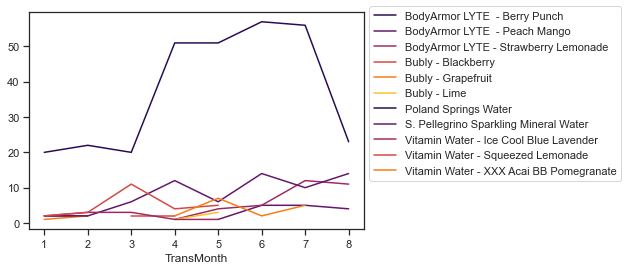

-_-_-_-_-_-_-_-_-_-_-_-_-


In [24]:

dfCategory = data[data['Category'] == 'Water']
trend_data = dfCategory.pivot_table(index='TransMonth', columns='Product', values='MQty', aggfunc='count')

default_cycler = (cycler(color=['red', 'green', 'black', 'yellow', 'blue', 'cyan', 'pink']) + cycler(linestyle=['-', '--', ':', '-.','--', ':', '-.']))

from matplotlib.pyplot import figure

figure(figsize=(20, 10), dpi=80)

trend_data.plot.line(subplots = False, color = sns.color_palette("inferno"), legend = True)
plt.rc('axes', prop_cycle=default_cycler)
plt.legend(bbox_to_anchor =(1, 1.05))
plt.show()
print('-_-_-_-_-_-_-_-_-_-_-_-_-')


### We have multiple products in the other categories hence the graphing all of them together will be cluttered 
### Hence we make different plots
### After running through all of them, we see there are way too many for a proper view and comparision. Hence we make use of Tableau for further analysis. 

Takis - Hot Chilli Pepper & Lime


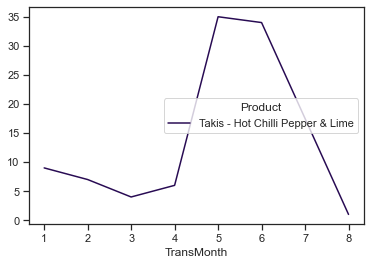

Miss Vickie's Potato Chip - Sea Salt & Vinega


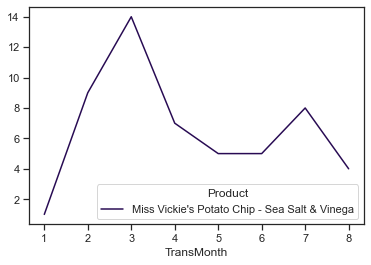

Miss Vickie's Potato Chip - Lime & Cracked Pe


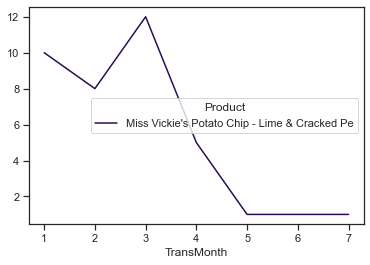

Seapoint Farms Dry Roasted Edamame - Wasabi


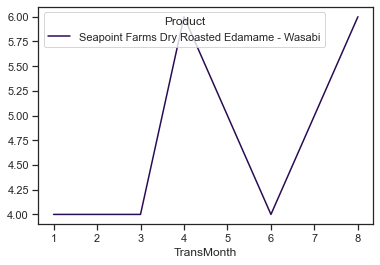

Skinny Pop Popcorn


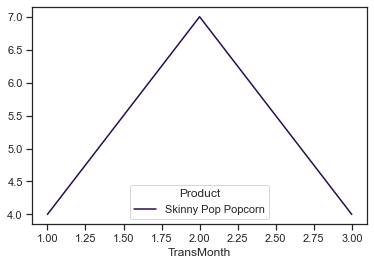

Stretch Island Fruit Leathers Snacks - Variet


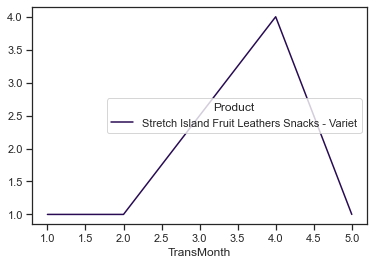

KitKat - Crisp Wafers


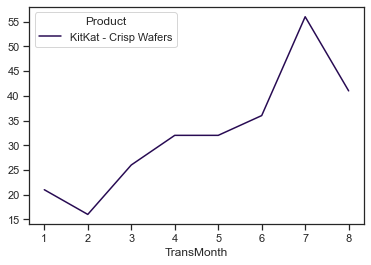

Wonderful Pistachios - Variety


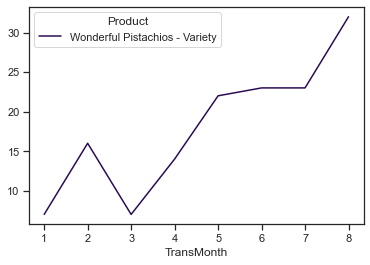

Miss Vickie's Potato Chip - Sea Salt Original


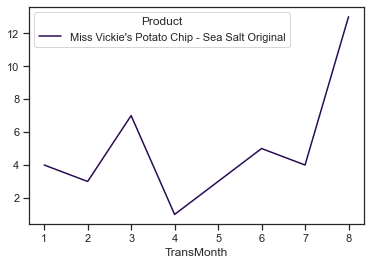

Jacks Links Bar Beef Strip


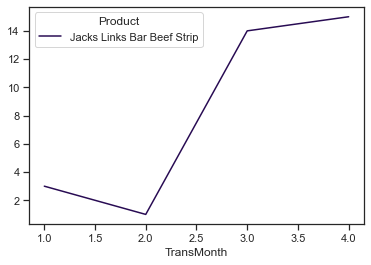

Cheetos - Fleming Hot Crunchy


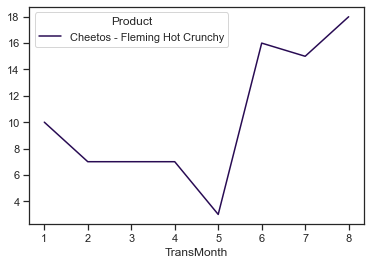

Pure Organic Fruit Bar - Strawberry Banana


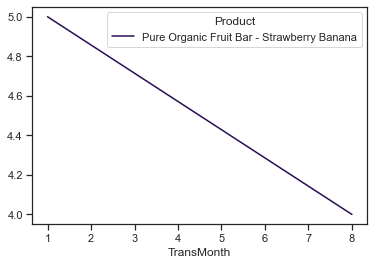

Oreo Mini


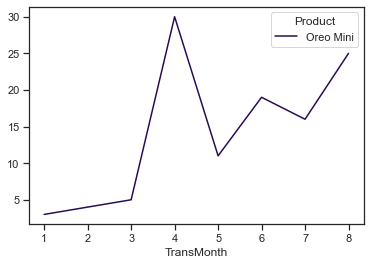

Nutter Butter Bites


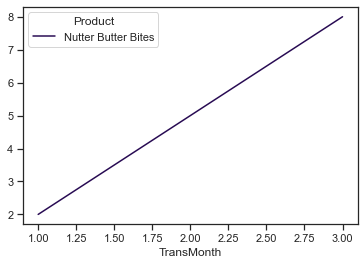

Jack Links Beef Steak Original


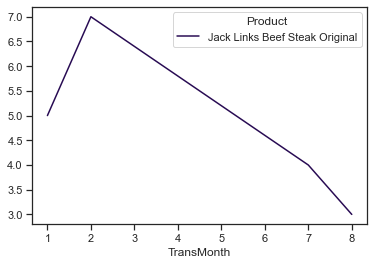

Robert Irvine's - Fit Crunch -  Chocolate Pea


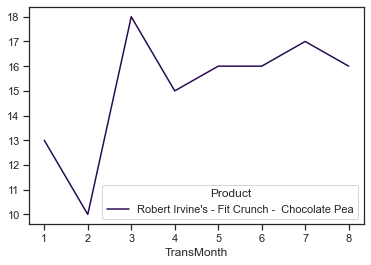

Good Health Veggie Stix - Zesty Ranch


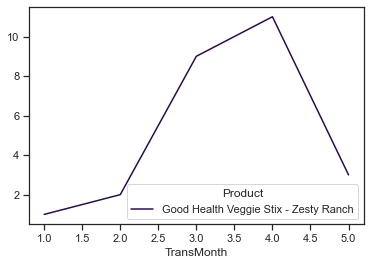

Cheetos Baked - Flaming Hot


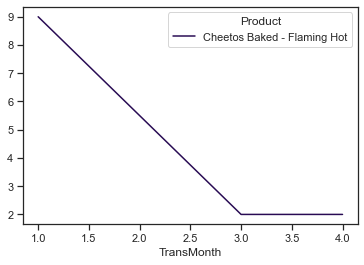

Mini Chips Ahoy


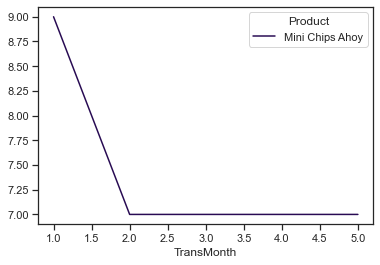

Newtons Fig Bar


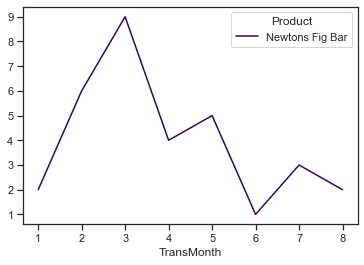

SunChips Multigrain - Salsa


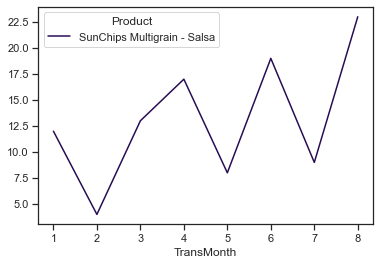

Chum Fruit Bites - Mango/Strawberry


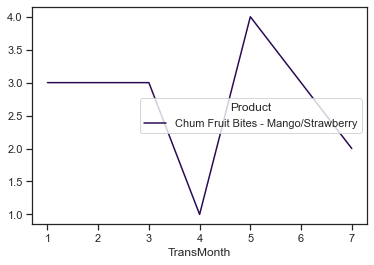

SunChips Multigrain - Harvest Cheddar


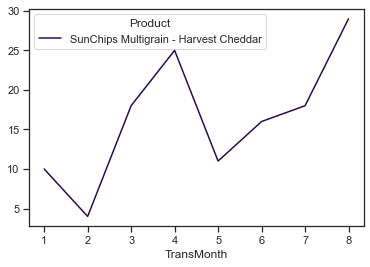

Good Health Veggie Stix - Sea Salt


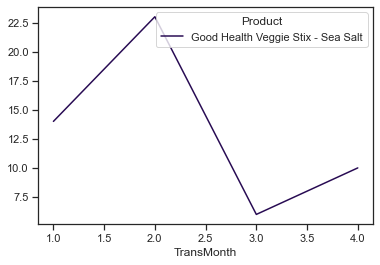

Larabar - Peanut Butter chocolate Chip


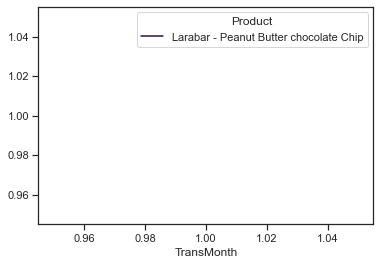

Chesters Fries Flaming hot


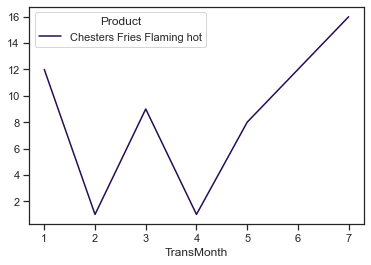

Miss Vickie's Potato Chip - Jalapeno


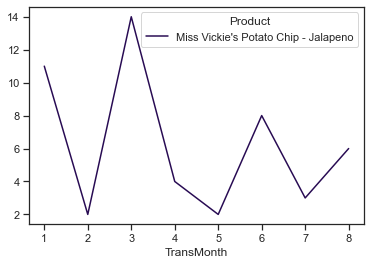

Ruffles Baked  - Cheddar & Sour Cream


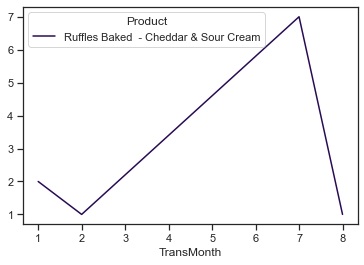

Ritz Bits Cheese


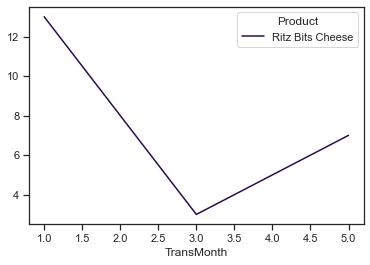

CheezIt - Original


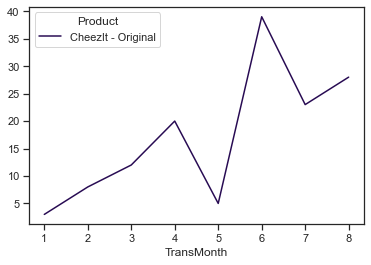

Takis FUGEO mini


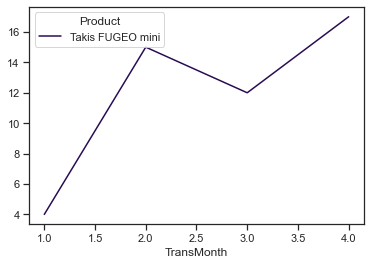

Miss Vickie's Potato Chip - Smokehouse BBQ


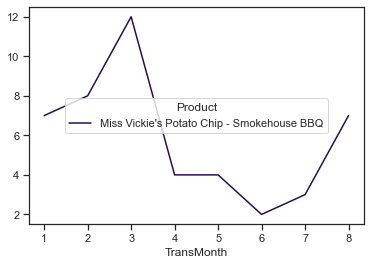

CheezIt - White Cheddar


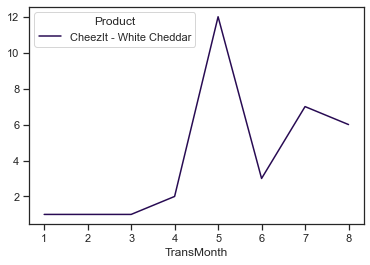

Nature's Valley Crunchy Granola Bar - Oats &


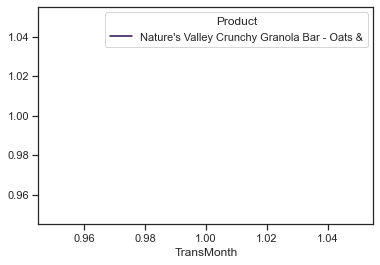

Lays Baked - Original


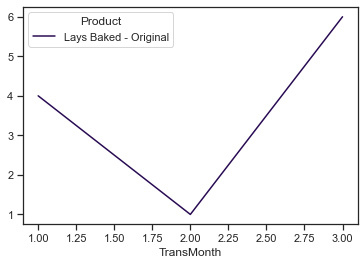

Belvita Breakfast Cookies - Blueberry


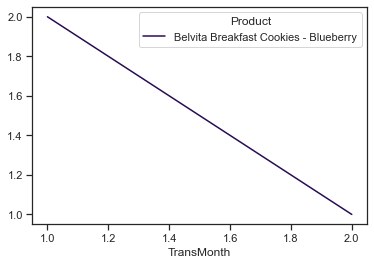

SunChips Multigrain - Original


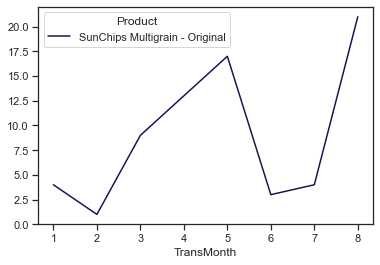

Popchips Potato - Barbeque


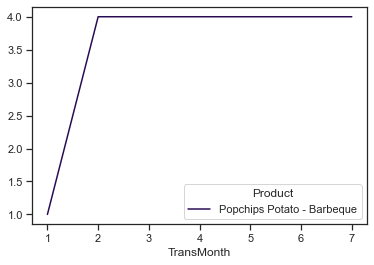

Snyder's of Hanover Pretzel - Cheddar Cheese


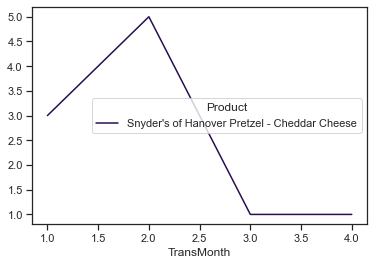

Pure Organic Pineapple Passionfruit


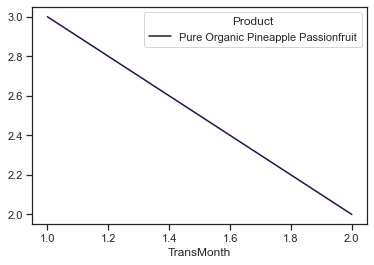

Nature's Valley Chewy Granola Bar - Fruit & N


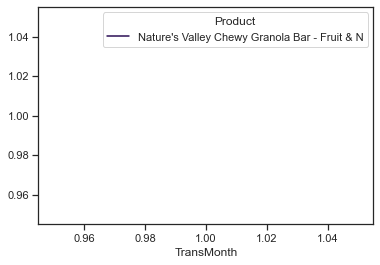

Popchips Potato - Sea Salt


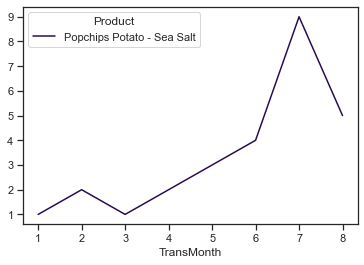

CheezIt - Double Cheese


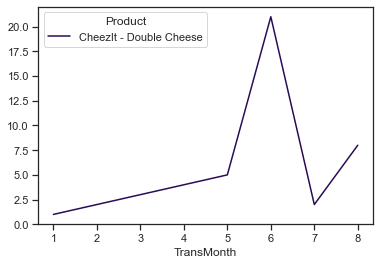

Lays Baked - Barbecue


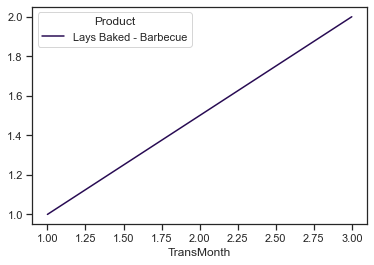

Funyuns - Flaming Hot


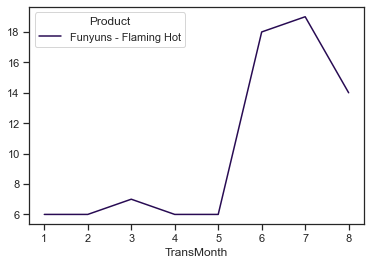

Munchies Snack mix Flaming Hot


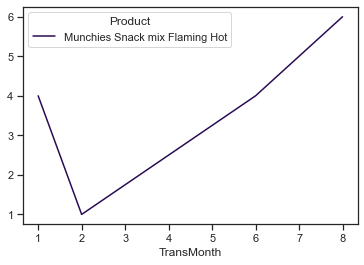

NuGo Dark Chocolate - Choc Chip


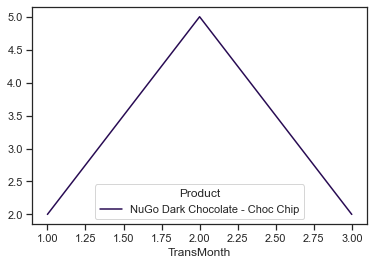

Oreo Single Server 6 ct


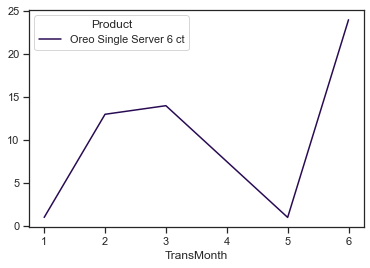

Cheetos Flaming Hot Limon Crunchy


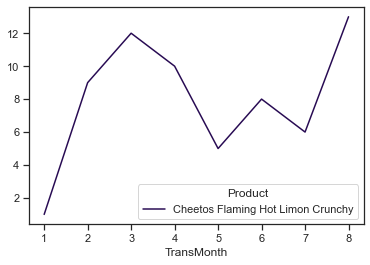

Oberto Specialty Meats - Original


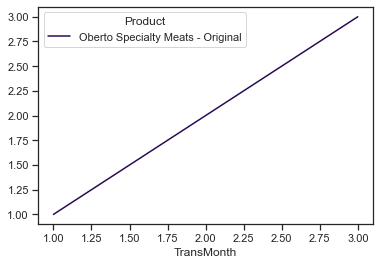

Doritos Famin Hot Nacho


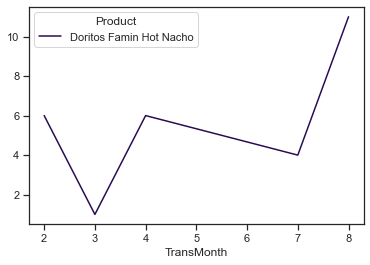

Kinder - Bueno - Crispy Creamy Chocolate


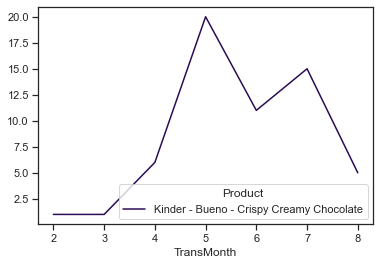

Belvita Snack Packs - Blueberry


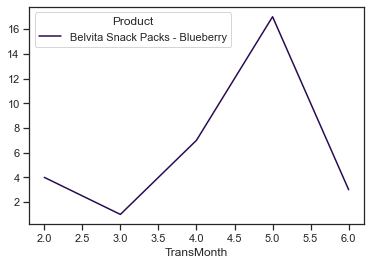

RXBAR - Protein Bar - Peanut Butter


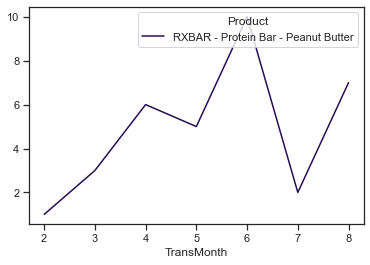

KIND Bar - Dark Choc Almond SeaSalt


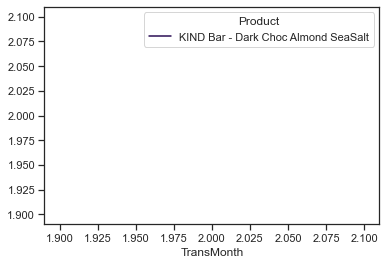

Fritos - Original


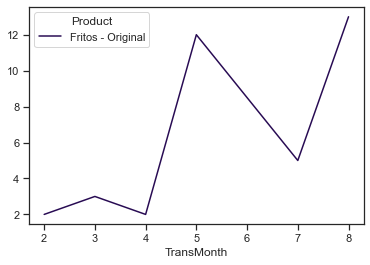

NuGo Dark Chocolate - Pretzel Sea Salt


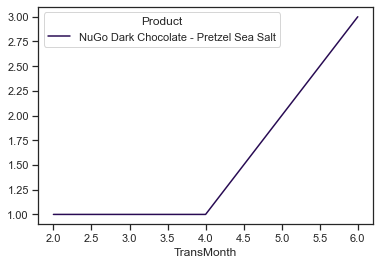

Cheetos Baked - Crunchy Cheese


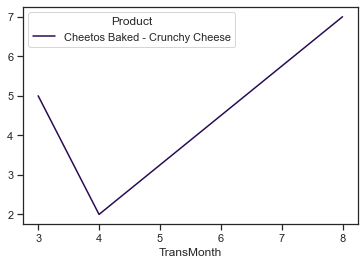

CheezIt - Cheddar Sour Cream and Onion


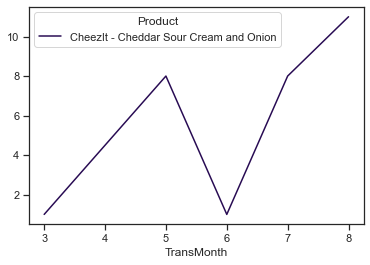

RXBAR - Protein Bar - Chocolate Sea Salt


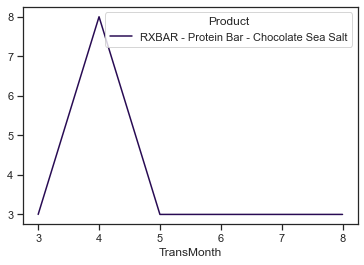

Doritos Nacho Cheese


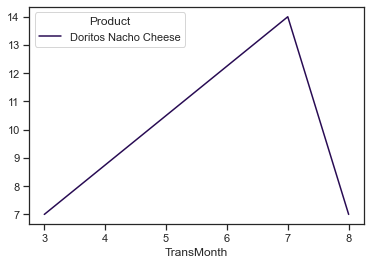

Cheetos - Crunchy


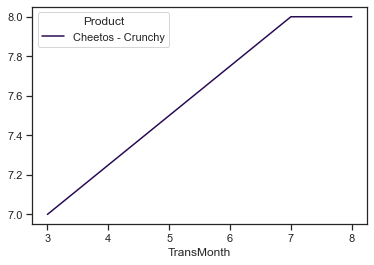

Doritos Cool Ranch


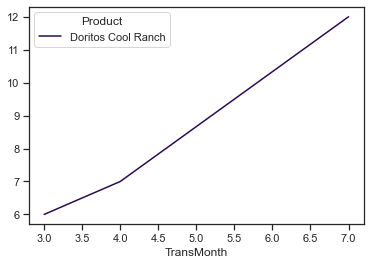

Lays - Classic


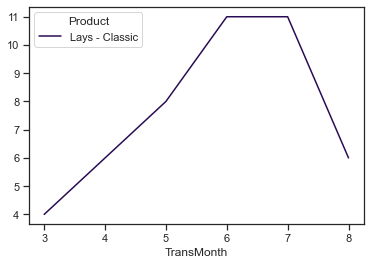

Genius Keto Bar - Chocolate Dream


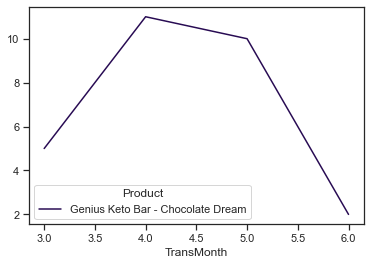

Lenny & Larrys - SnickerDoodle


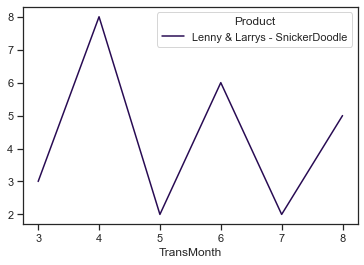

Autumns Granola Bar - Cinnamon Almond


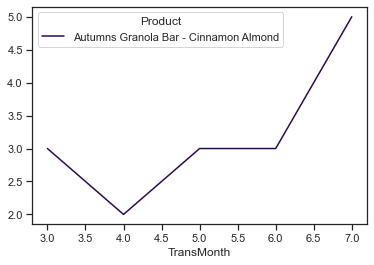

SunChips Multigrain - French Onion


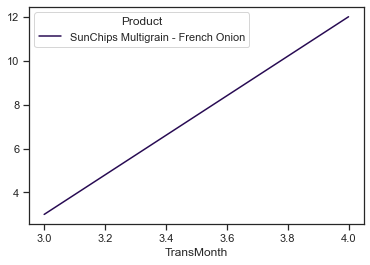

Hungry Buddha - Chocolate Chip


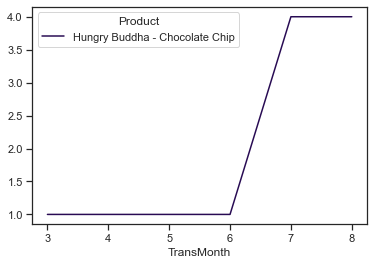

Doritos Dinamita Chile Lemon


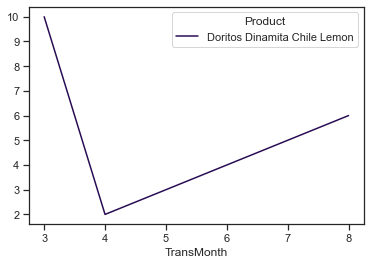

Hungry Buddha - Coconut Cocoa


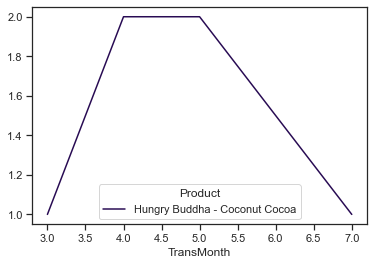

Made in Nature - Mangoes Sweet & Tangy


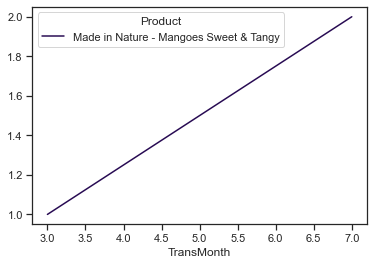

Belvita Snack Packs - Cinnamon


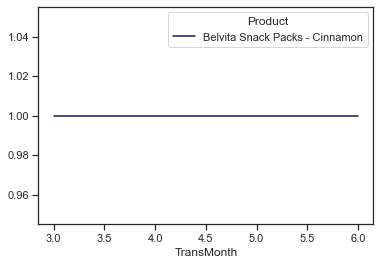

Keto Bar - Creamy Peanut Butter Chocolate


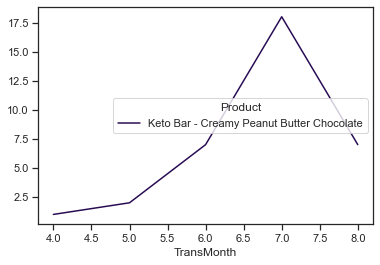

Skippy Peanut Butter - Go Paks


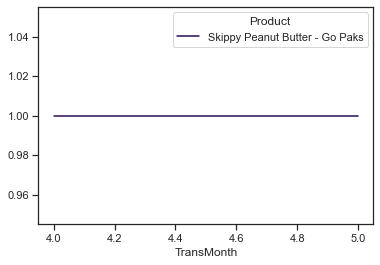

Belvita Snack Bites - Cinnamon BS Go Paks


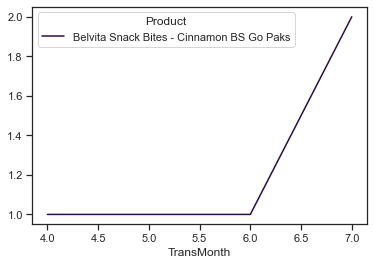

Pop Corners - Kettle Corn


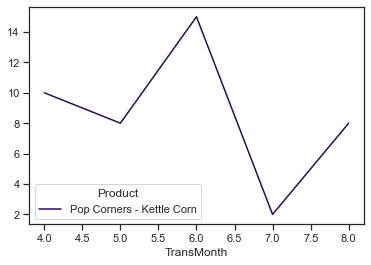

Quaker Caramel Rice Crisps


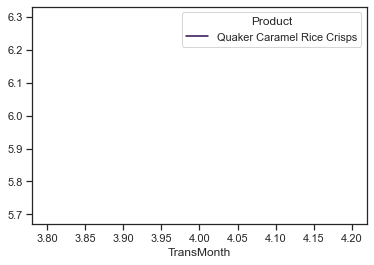

Belvita Snack Packs - Chocolate


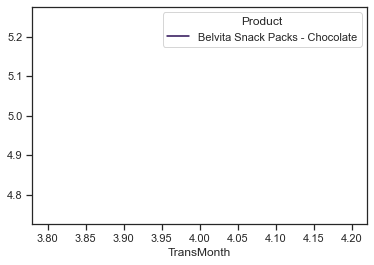

Pop Corners - Sea Salt


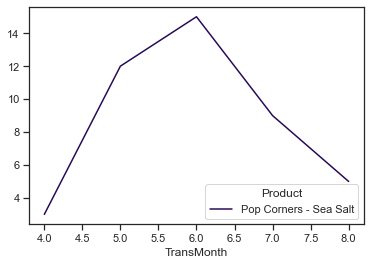

Pop Corners - Spicy Queso


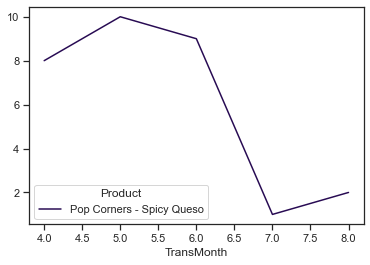

Quaker Apple Cinnamon Rice Crisps


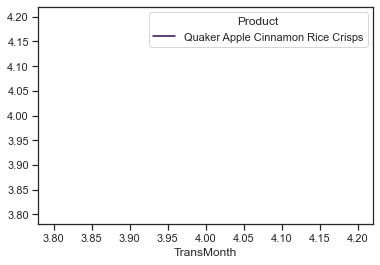

Quaker ButterMilk Ranch Rice Crisps


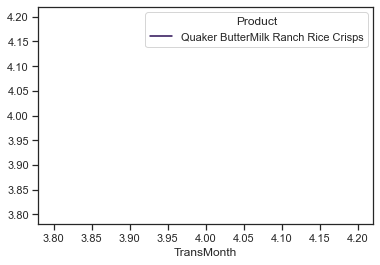

Pop Corners - White Cheddar


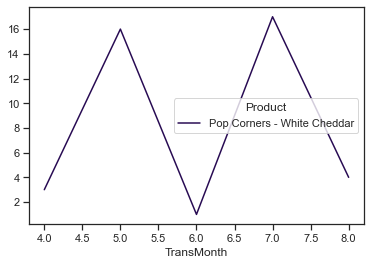

Nutri Grain Apple Cinnamon


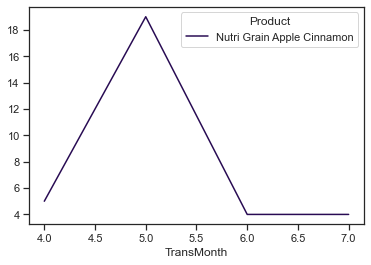

Quaker Cheddar Rice Crisps


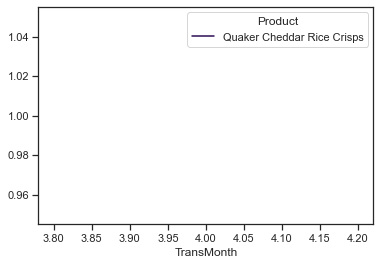

Cheetos Puffs


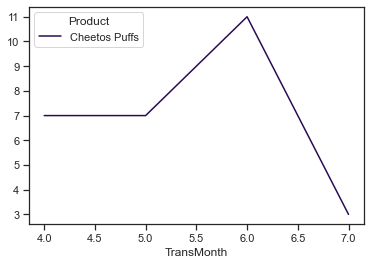

Cheetos Cheddar Jalapeno


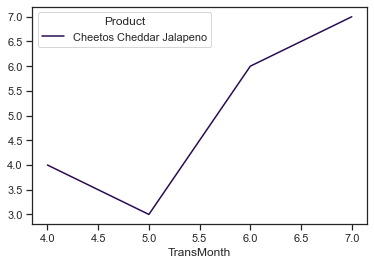

Nature's Garden Trail Mix - Cranberry Healthy


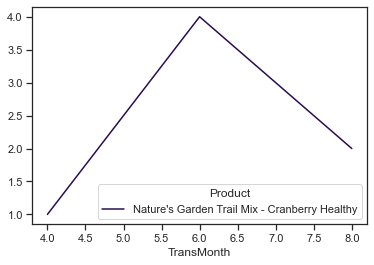

Keep Healthy - Chocolate Fudge


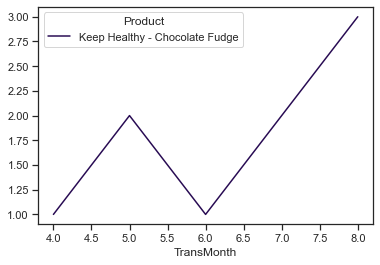

CheezIt - Go Paks


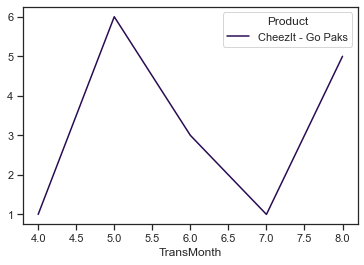

Lenny & Larrys - Chocolate Chip


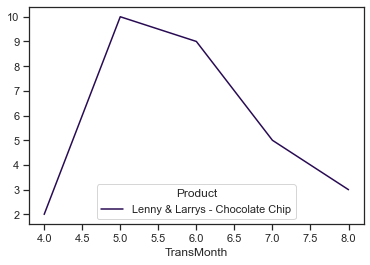

Snyder's of Hanover Pretzel Pieces - Honey Mu


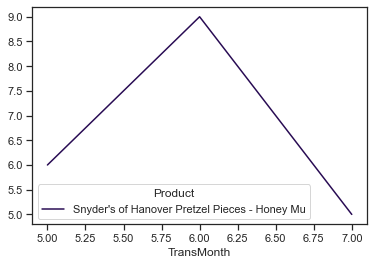

Belvita Breakfast Biscuit Bites - Blueberry


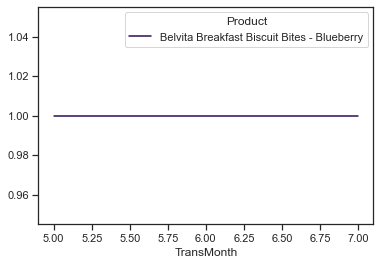

Snyder's of Hanover Pretzel Pieces - Hot Buff


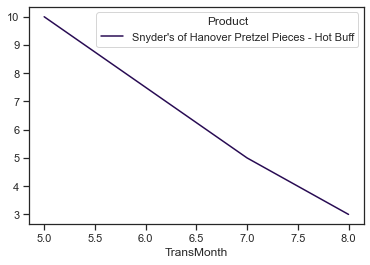

Ice Breakers Ice Cubes - PepperMint


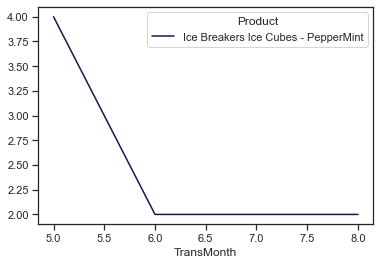

Goldfish Baked - Cheddar


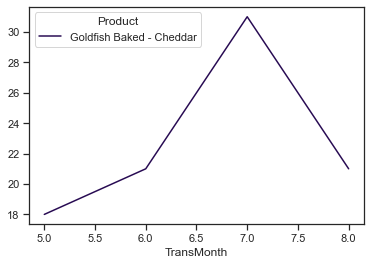

Doritos Spicy Nacho


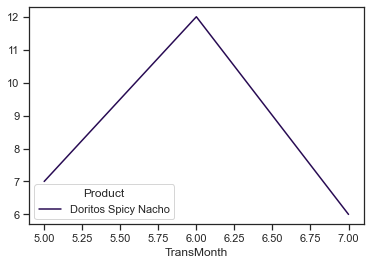

Pop Corners - Sweet & Salty Kettle


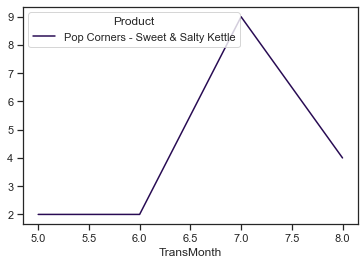

Mini Chips Ahoy - Go Paks


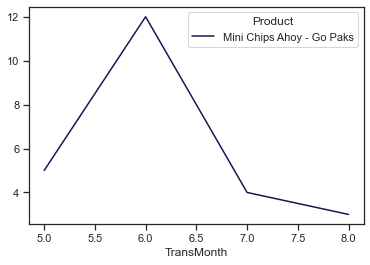

Oreo Mini - Go Paks


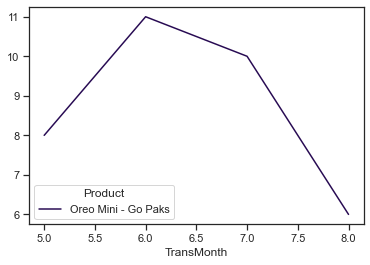

Teddy Grahams - Go Paks


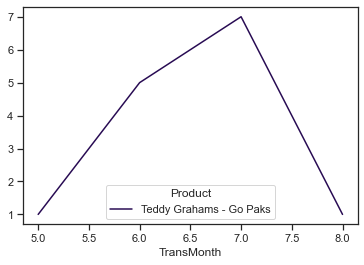

Snyder's of Hanover Pretzel Pieces - Cheddar


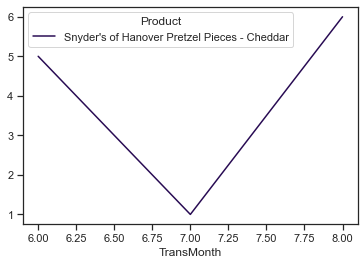

Nature's Bakery Fig Bar - Blueberry


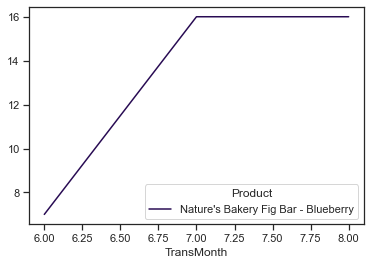

Nature's Bakery Fig Bar - Raspberry


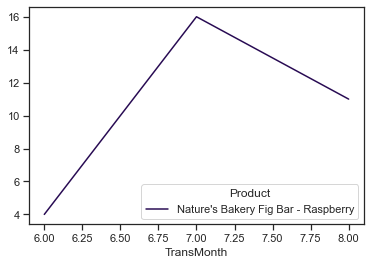

Popchips Potato - Sour Cream & Onion


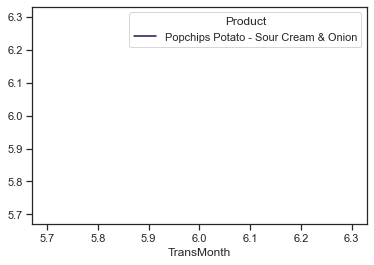

Pringles - Cheddar Cheese


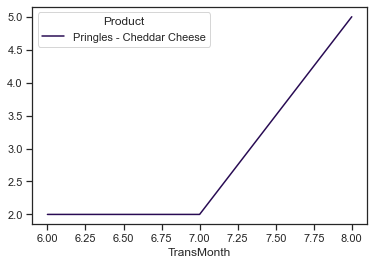

Pringles - Sour Cream & Onion


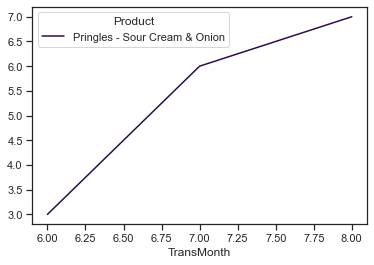

Zone Perfect - Chocolate Chip Cookie Dough


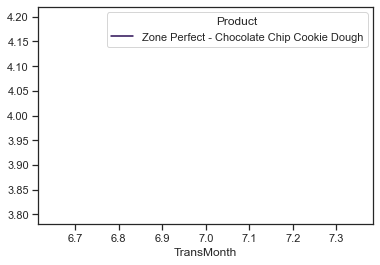

Nature's Garden Trail Mix - Omega 3


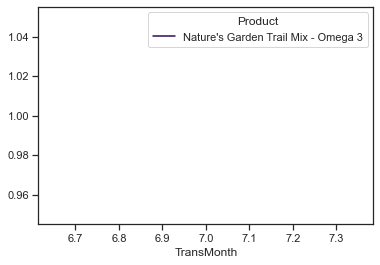

Nature's Garden Trail Mix - Heart Healthy Mix


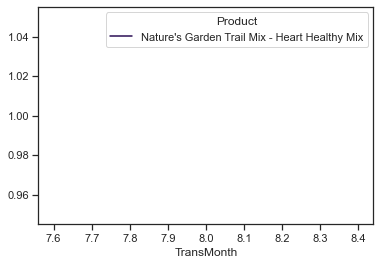

Keto Bar - Chocolate Dream


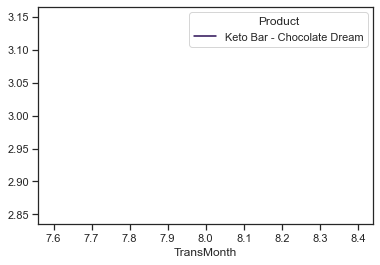

Lindens - Chocolate Chippers


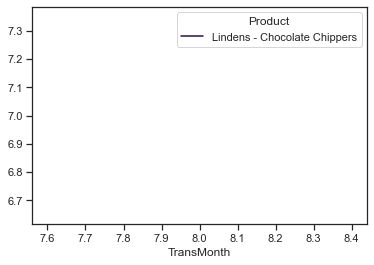

Pure Organic Fruit Bar - Raspberry Lemonade


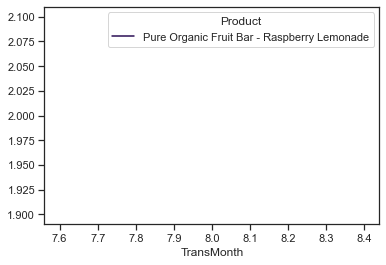

TruBar - Cookie Dough


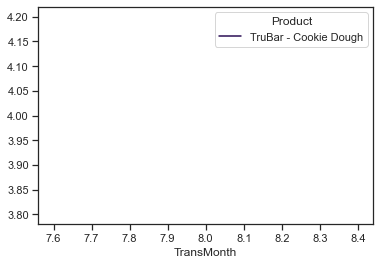

TruBar - Daydreaming about Donuts


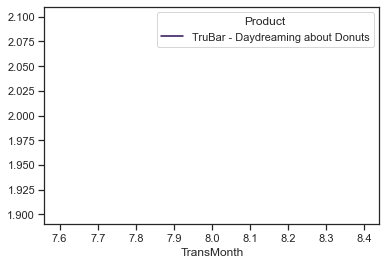

In [25]:

dfCategory = data[data['Category'] == 'Food']
for product in dfCategory['Product'].unique():
    print(product)
    dfproduct = dfCategory[dfCategory['Product'] == product]
    trend_data = dfproduct.pivot_table(index='TransMonth', columns='Product', values='MQty', aggfunc='count')

#     default_cycler = (cycler(color=['r', 'g', 'b', 'y']) + cycler(linestyle=['-', '--', ':', '-.']))

    trend_data.plot.line(subplots = False, color = sns.color_palette("inferno"))
#     plt.rc('axes', prop_cycle=default_cycler)
    plt.show()


Red Bull - Energy Drink - Sugar Free


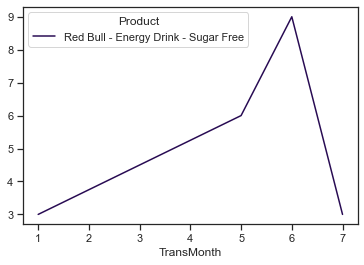

Monster Energy Original


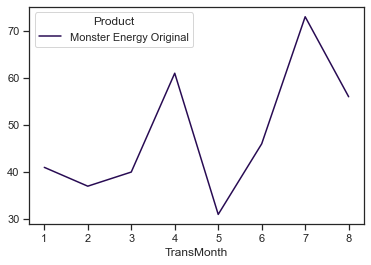

Spindrift - Sparkling Water  Lime


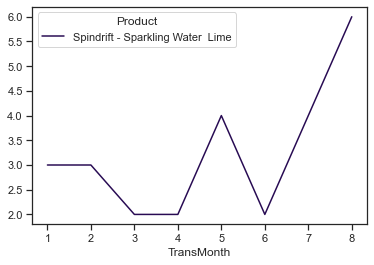

Keto Krisp - Almond/Chocolate


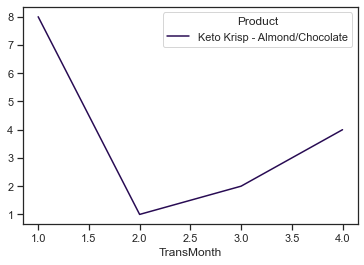

Monster Energy  Zero Ultra


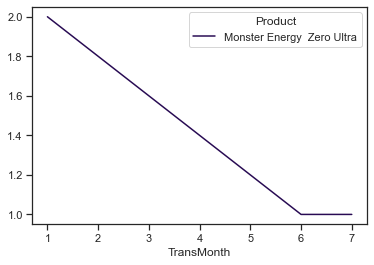

Coca Cola - Zero Sugar


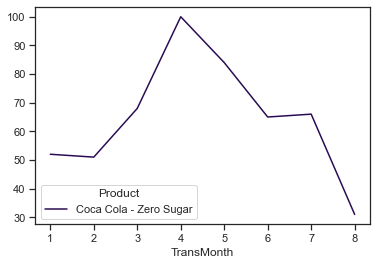

Red Bull - Original


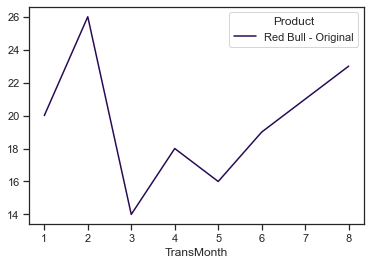

Bubly - Cherry


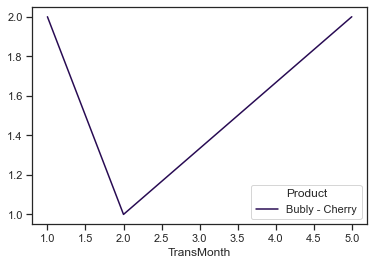

Keto Krisp - Almond Butter


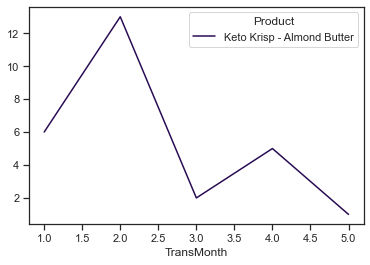

Sunkist Soda - Orange


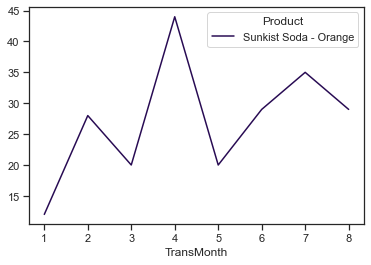

Spindrift - Sparkling Water - Pineapple


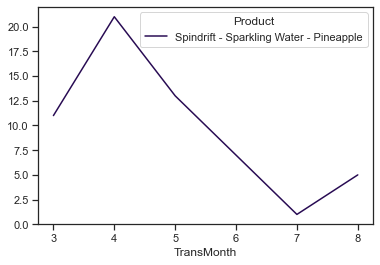

Remedy Kombucha - Ginger Lemon


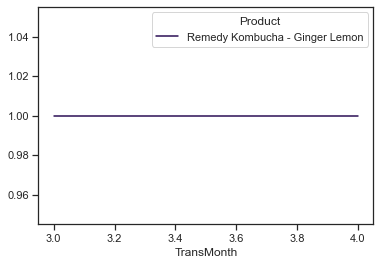

Starbucks Refresher - Real Coconut Water


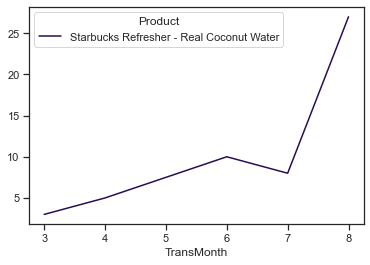

Bubly - Mango


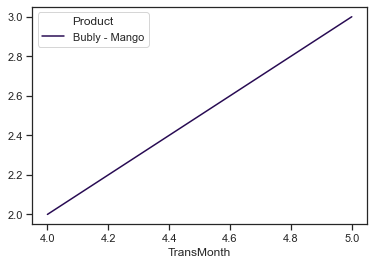

Canada Dry - Ginger Ale & Lemonde


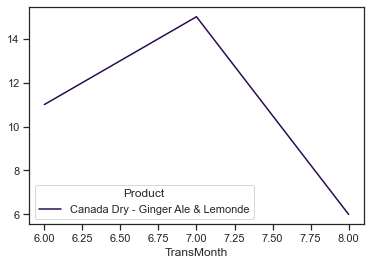

Canada Dry - Ginger Ale


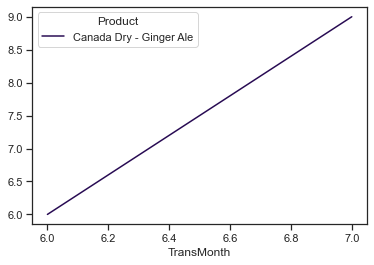

Coca Cola - Regular


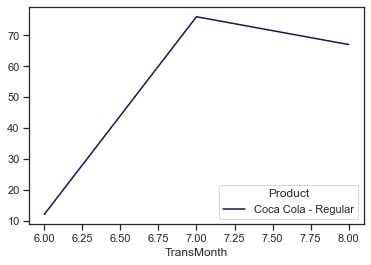

S. Pellegrino Essenza Mineral Water - Blood O


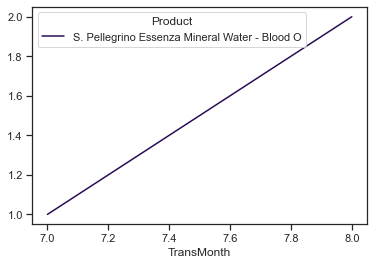

In [26]:

dfCategory = data[data['Category'] == 'Carbonated']
for product in dfCategory['Product'].unique():
    print(product)
    dfproduct = dfCategory[dfCategory['Product'] == product]
    trend_data = dfproduct.pivot_table(index='TransMonth', columns='Product', values='MQty', aggfunc='count')

    trend_data.plot.line(subplots = False, color = sns.color_palette("inferno"))
    plt.show( block=False)


Bai Antioxidant - Brasilia BB


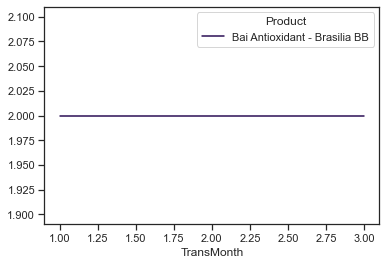

Snapple Diet Tea - Lemon


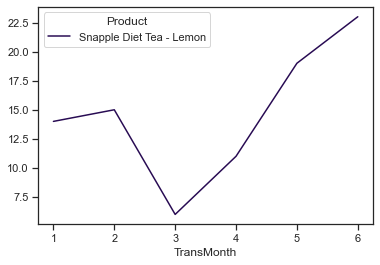

Snapple Diet Tea - Raspberry


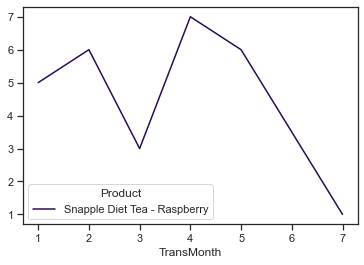

Zevia Zero Calorie Energy - Mango Ginger


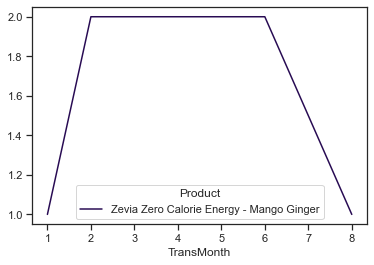

V8 Vegetable Juice - Original


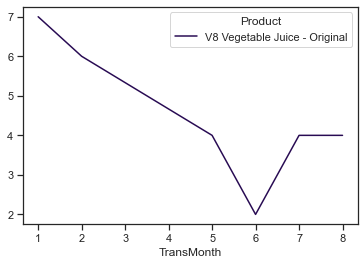

Snapple Diet Tea - Peach Tea


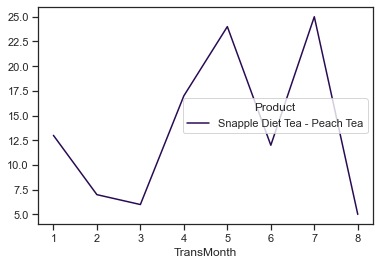

Bai Antioxidant - Molokai Coconut


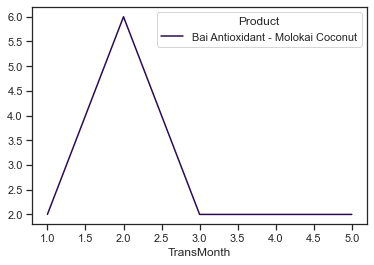

Bai Antioxidant - Zambia Bingcherry


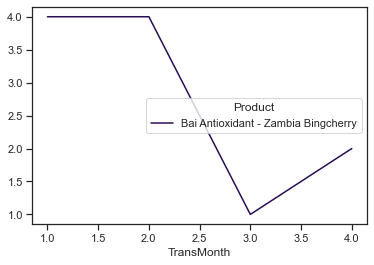

Spindrift - Sparkling Water Raspberry Lime


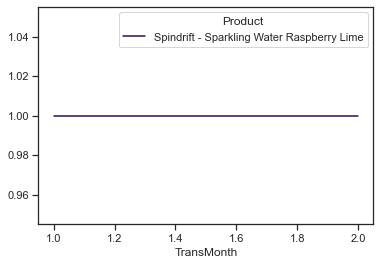

Snapple Tea - Raspberry


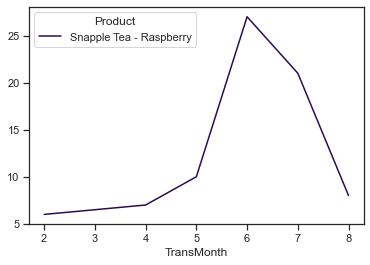

Starbucks Doubleshot Energy - Mocha


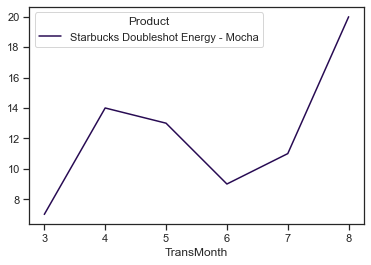

Iberia Coconut Water


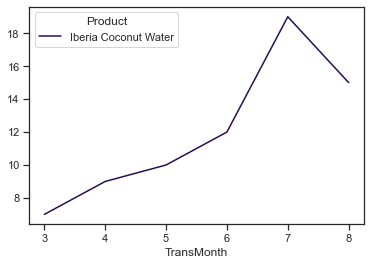

Bai Antioxidant - Kula Watermelon


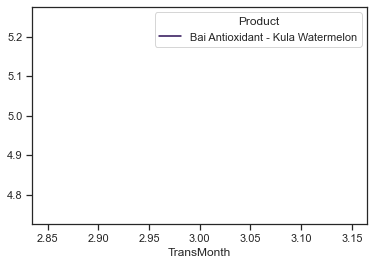

Honest Tea - Berry Hibiscus


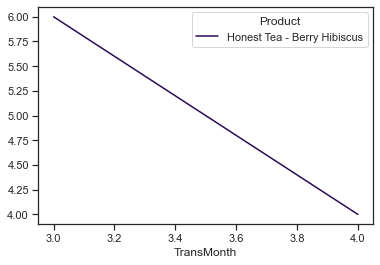

Bai Antioxidant - Kupang strawberry kiwi


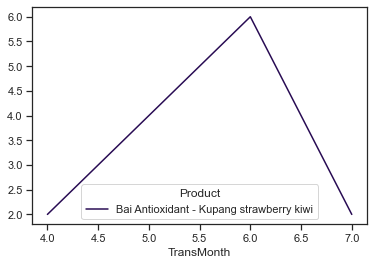

Bai Antioxidant - Tanzania Lemon Super Tea


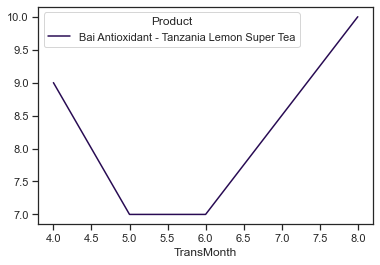

Bai Lemonade - Burundi Blueberry


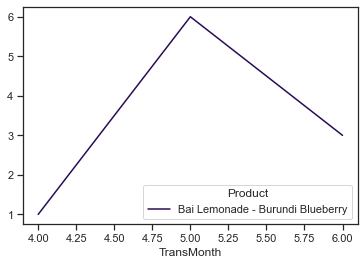

BodyArmor  LYTE - Blueberry Pomegranate


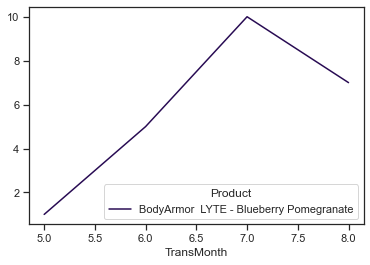

Starbucks Doubleshot Energy - Coffee


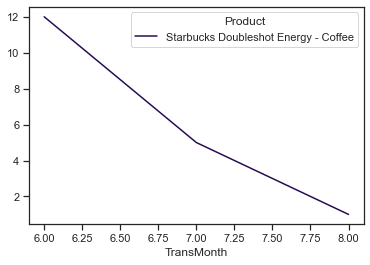

Snapple Tea - Lemon


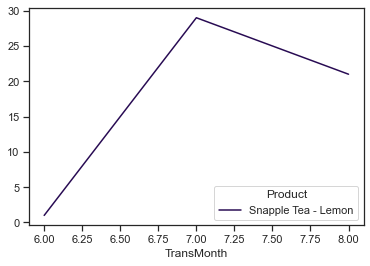

Snapple Tea - Peach


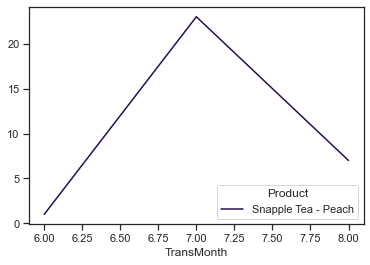

Snapple Lemonade - black berry


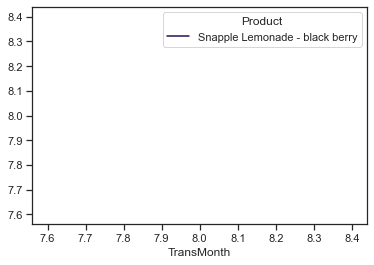

Snapple Lemonade - watermelon


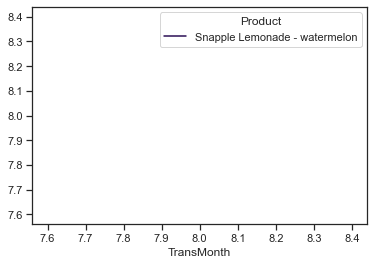

Snapple Lemonade - pineapple


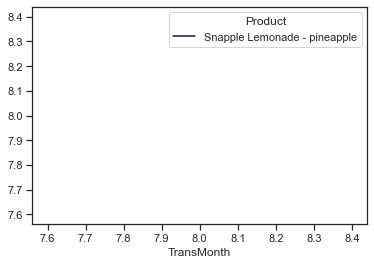

Zevia Organic Tea - Peach


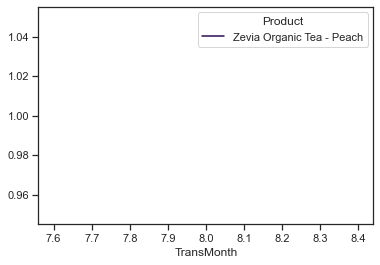

In [27]:

dfCategory = data[data['Category'] == 'Non Carbonated']

for product in dfCategory['Product'].unique():
    print(product)
    dfproduct = dfCategory[dfCategory['Product'] == product]
    trend_data = dfproduct.pivot_table(index='TransMonth', columns='Product', values='MQty', aggfunc='count')

    trend_data.plot.line(subplots = False, color = sns.color_palette("inferno"))
    
    plt.show( block=True)
